In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('crop_production.csv')

In [4]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
df['State_Name'].str.lower()
df['District_Name'].str.lower()
df['Season'].str.lower()
df['Crop'].str.lower()

0                    arecanut
1         other kharif pulses
2                        rice
3                      banana
4                   cashewnut
                 ...         
246086                   rice
246087                sesamum
246088              sugarcane
246089                   rice
246090                sesamum
Name: Crop, Length: 246091, dtype: object

In [6]:
df.shape

(246091, 7)

In [7]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
df[df['Production'].isnull()]


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [9]:
# Since there are null values only in the 'Production' column, we can replace them with the median value of that column
# median_production = df['Production'].median()
# df['Production'].fillna(median_production, inplace=True)

# Alternatively, you can remove rows with null values in the 'Production' column
df.dropna(subset=['Production'], inplace=True)

# Confirm that null values have been handled
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
#this block confirms the removal of the rows 
print(df.shape)
print(246091-242361)

(242361, 7)
3730


In [12]:
df.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [14]:
df = df[df['Production'] !=0]
df[df['Production'] ==0]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [15]:
df['Crop_Year'].unique() # Lets see since what year the data has been collected

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [16]:
len(df['State_Name'].unique()) #Lets see how many states and UT are there

33

In [17]:
df['State_Name'].unique()  #lets see the different states and UTs from where the data is collected

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [18]:
df['District_Name'].nunique()

646

In [19]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['Production'].sort_values(ascending = False)

178273   1250800000.00
178331   1212000000.00
100654   1125000000.00
100612   1063000000.00
100149   1059000000.00
              ...     
113797            0.01
123929            0.01
120480            0.01
117887            0.01
121470            0.01
Name: Production, Length: 238838, dtype: float64

In [20]:
#finding the state with highest production
df.loc[178273]

State_Name         Tamil Nadu
District_Name      COIMBATORE
Crop_Year                2011
Season            Whole Year 
Crop                 Coconut 
Area                 82704.00
Production      1250800000.00
Name: 178273, dtype: object

In [21]:
df[df['Area'] == 82704.00]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
178273,Tamil Nadu,COIMBATORE,2011,Whole Year,Coconut,82704.00,1250800000.00


In [22]:
# Tamilnadu is the state is with highest production of any crop with 1250 million tonnes or 1.25 billion tonnes of Coconut 
# in the year 2011
no_of_diff_crops = df['Crop'].nunique()
types_of_crops = df['Crop'].unique()

print('There are {} different types of crops'.format(no_of_diff_crops))
print('------------------------------------')
print('They different types of crops are :-',types_of_crops)

There are 105 different types of crops
------------------------------------
They different types of crops are :- ['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Beans & Mutter(Vegetable)' 'Bhindi' 'Brinjal'
 'Citrus Fruit' 'Grapes' 'Mango' 'Orange' 'Other Fresh Fruits' 'Papaya'
 'Pome Fruit' 'Tomato' 'Soyabean' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Niger seed'
 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total' 'Jute'
 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannham

In [23]:
df['Season'].value_counts()

Season
Kharif         93765
Rabi           65904
Whole Year     53385
Summer         14804
Winter          6050
Autumn          4930
Name: count, dtype: int64

# Yield_per_State


In [24]:
df.head(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,1.00


In [25]:
state=df['Area'].unique()

In [26]:
Yield_per_State = []
for state in df['State_Name'].unique():
    total_yield = df[df['State_Name'] == state]['Production'].sum()
    Yield_per_State.append(total_yield)

In [27]:
df['Production'].sum()

141176116767.38998

In [28]:
df['Production']

0          2000.00
1             1.00
2           321.00
3           641.00
4           165.00
            ...   
246086      801.00
246087      463.00
246088    16250.00
246089   597899.00
246090       88.00
Name: Production, Length: 238838, dtype: float64

In [29]:
Yield_per_State

[718223239.99,
 17324590296.0,
 6823912.6000000015,
 2111751759.0,
 366483596.66,
 63956.5,
 100951908.00999999,
 1847871.0,
 505755757.58,
 524291337.0,
 381273890.0,
 17805168.6,
 13291015.7,
 10777741.75,
 863429811.6800001,
 97880045375.70001,
 448840738.65999997,
 1263640606.1999998,
 5230917.0,
 12112496.0,
 1661539.83,
 12765950.0,
 160904070.10000002,
 384724502.0,
 586385001.0,
 281320270.5,
 2435735.0,
 12076443048.93,
 335147930.0,
 12522917.0,
 3234492662.7,
 132177355.0,
 1397904389.7]

# Yield per State Graph

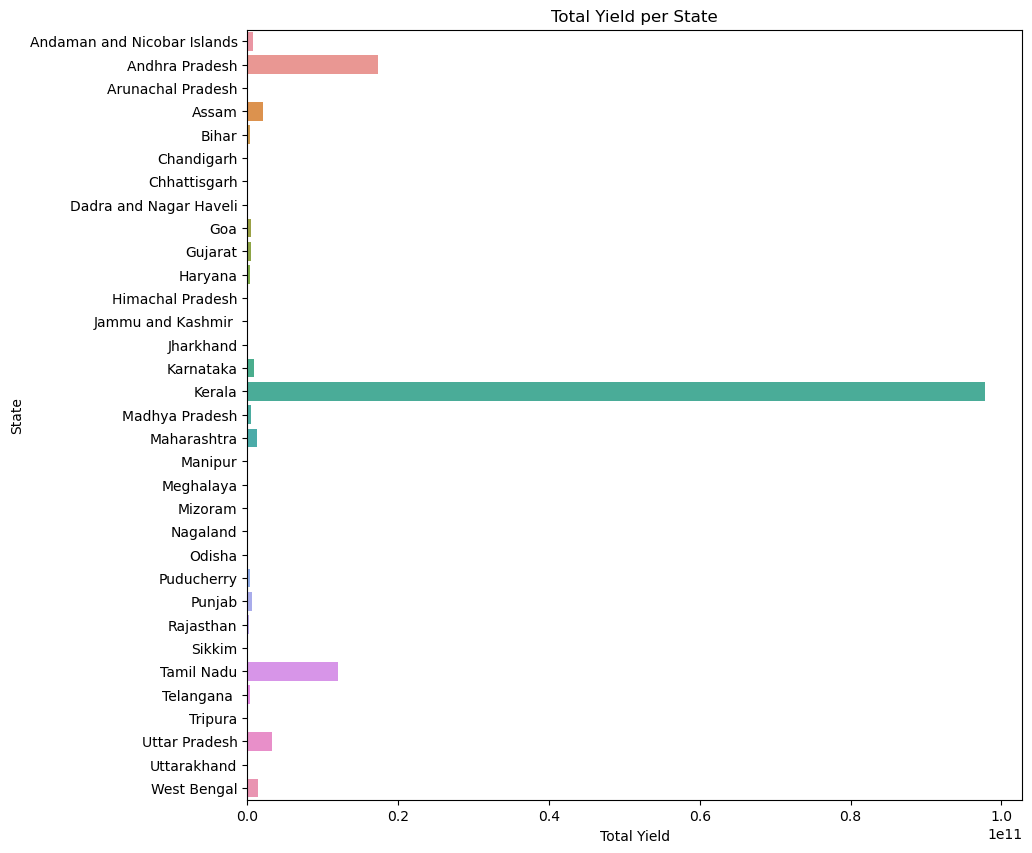

In [30]:
# Yield_per_State is a list of floats representing total yields per state
state_names = df['State_Name'].unique()  # Get unique state names from the DataFrame
total_yields = Yield_per_State  #  Yield_per_State is already a list of total yields
plt.figure(figsize=(10, 10))
sns.barplot(y=state_names, x=total_yields)
plt.xlabel('Total Yield')
plt.ylabel('State')
plt.title('Total Yield per State')
plt.show()



In [31]:
df['Crop'].value_counts()

Crop
Rice                  15078
Maize                 13723
Moong(Green Gram)     10037
Urad                   9669
Groundnut              8732
                      ...  
Ricebean (nagadal)       10
Jobster                   9
Perilla                   9
Coffee                    6
Turnip                    6
Name: count, Length: 105, dtype: int64

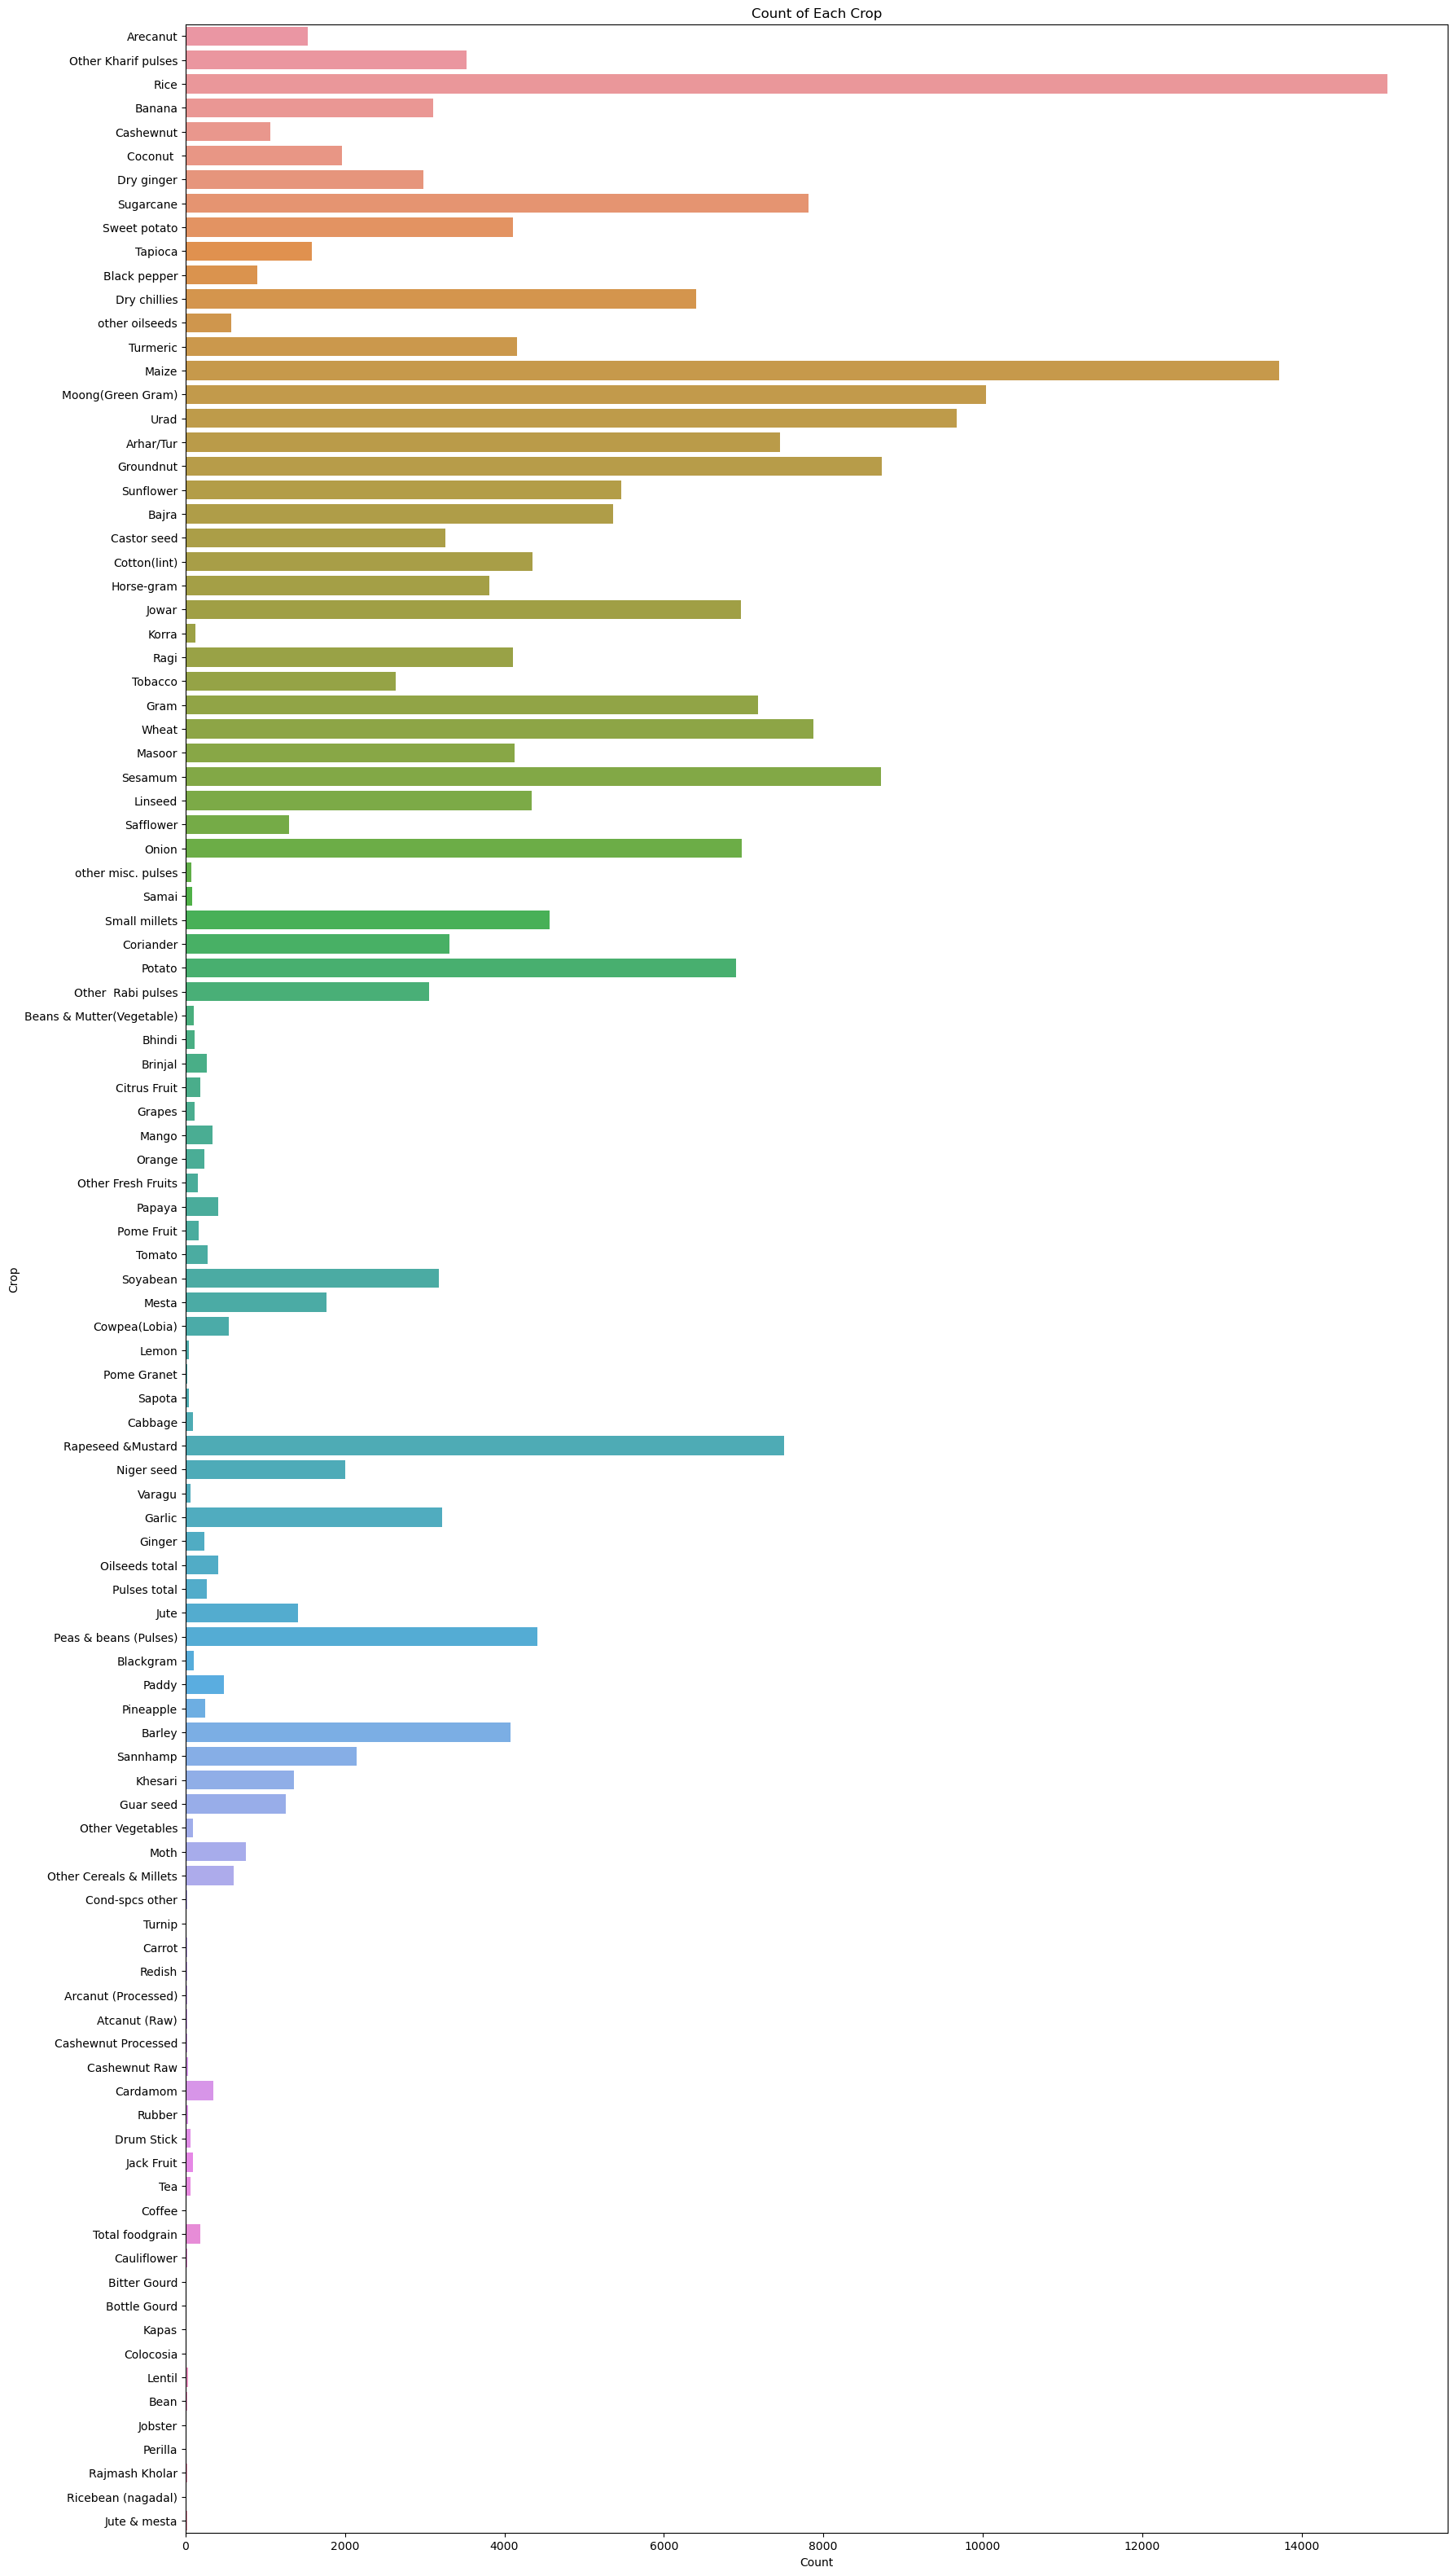

In [32]:
# sns.countplot(y=df['Crop']).
plt.figure(figsize=(20, 40))  # Adjust the figure size if needed
sns.countplot(y=df['Crop'])
plt.xlabel('Count')
plt.ylabel('Crop')
plt.title('Count of Each Crop')
plt.show()

# Yield Vs Crop

In [33]:
crops = (df['Crop'].unique())

In [34]:
Yield_per_crop = []
for crop in crops:
    Yield_per_crop.append(df[df['Crop']==crop]['Production'].sum())

In [35]:
Yield_per_crop

[20346591.66,
 4349860.38,
 1605470383.37,
 146132679.64000002,
 2591179.23,
 129981629216.29,
 10046329.12,
 5535681525.92,
 7848014.35,
 105007205.3,
 1784234.4099999997,
 17712254.21,
 4769908.8100000005,
 9966243.48,
 273341803.57,
 18303187.800000004,
 22410490.66,
 39331390.33,
 111744878.19999999,
 13263079.65,
 129680996.0,
 15952058.649999999,
 297000015.7,
 4162613.4,
 114598259.1,
 123713.0,
 35131401.16,
 10496158.02,
 99414235.33,
 1332825656.8000002,
 13153383.85,
 11009030.86,
 2537279.52,
 2821106.48,
 72453049.2,
 9704.220000000001,
 145175.0,
 5630375.6,
 3755117.22,
 424826343.86,
 4805261.4,
 211359.0,
 317077.0,
 1442172.0,
 879567.0,
 1751593.0,
 12770536.0,
 2338803.0,
 399443.0,
 3922521.0,
 481340.0,
 4724984.0,
 141837219.4,
 12393542.0,
 240638.0,
 540994.0,
 66334.0,
 280427.0,
 311419.0,
 90869265.82000001,
 1352354.0,
 49694.0,
 8788773.8,
 821925.7,
 43867560.0,
 15675354.0,
 181558177.9,
 8752955.24,
 43939.0,
 31702401.0,
 2127594.0,
 22098266.92,
 3769

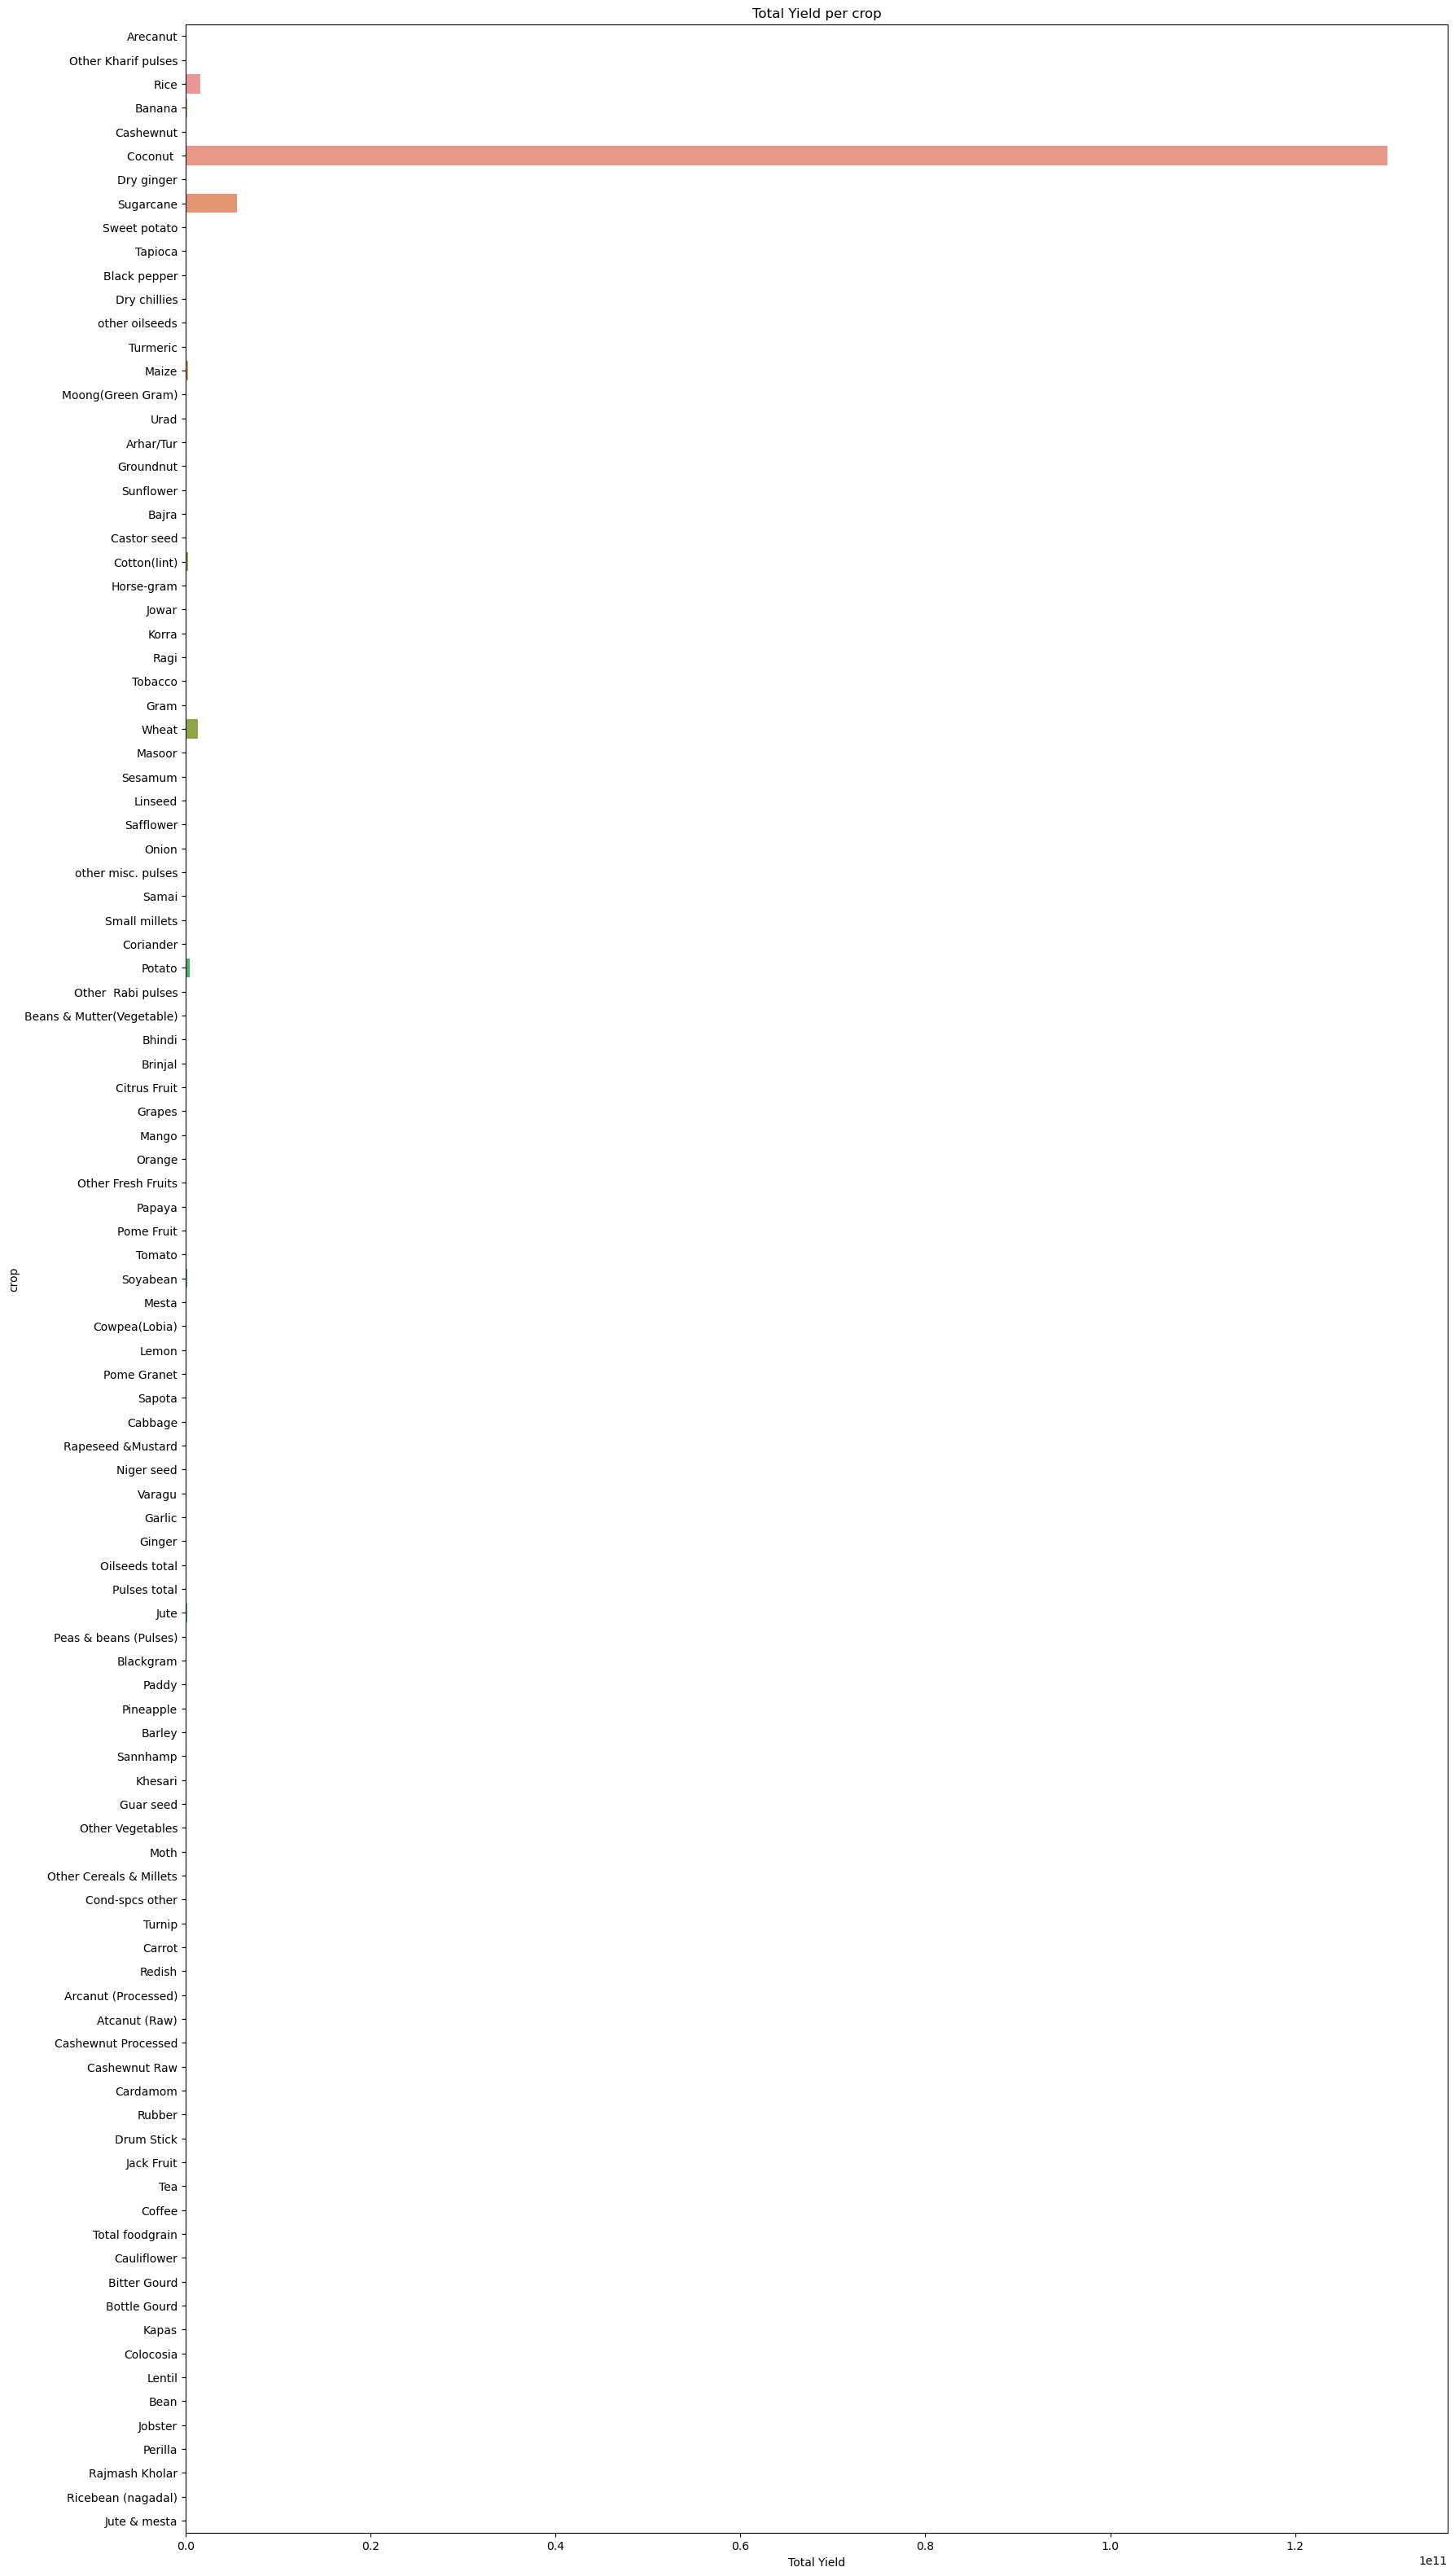

In [36]:
crop_names = df['Crop'].unique() 
total_yields = Yield_per_crop
plt.figure(figsize=(20, 40))
sns.barplot(y=crop_names, x=total_yields)
plt.xlabel('Total Yield')
plt.ylabel('crop')
plt.title('Total Yield per crop')
plt.show()

# Train Test Split Rearrangement

In [37]:
x = df.drop("Production",axis=1)
y = df['Production'] 

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=2,random_state=0)

In [40]:
X_train.shape

(238836, 6)

In [41]:
X_train

,State_Name,District_Name,Crop_Year,Season,Crop,Area
109175,Madhya Pradesh,DINDORI,2009,Whole Year,Rapeseed &Mustard,17209.00
143023,Nagaland,DIMAPUR,2004,Kharif,Maize,6980.00
95463,Karnataka,SHIMOGA,2008,Kharif,Potato,1.00
202459,Uttar Pradesh,BAHRAICH,2012,Rabi,Linseed,84.00
220907,Uttar Pradesh,MAHOBA,2003,Kharif,Maize,18.00
...,...,...,...,...,...,...
183190,Tamil Nadu,NAMAKKAL,2008,Whole Year,Urad,300.00
122384,Madhya Pradesh,SHIVPURI,2004,Kharif,Arhar/Tur,478.00
179586,Tamil Nadu,DINDIGUL,2003,Whole Year,Banana,3018.00
43761,Bihar,SITAMARHI,1999,Kharif,Dry ginger,2.00


In [42]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [43]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
scalar = StandardScaler()

In [44]:
preprocessor = ColumnTransformer(
transformers=[
    ('onehotencoding', ohe,[0,1,3,4]),
    ('standardisation',scalar,[2,5])
],
    remainder='passthrough'
    )

In [45]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoding',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [0, 1, 3, 4]),
                                ('standardisation', StandardScaler(), [2, 5])])

In [46]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [47]:
X_train_dummy

<238836x788 sparse matrix of type '<class 'numpy.float64'>'
	with 1427405 stored elements in Compressed Sparse Row format>

# Model Training

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [49]:
models = {
    'lr': LinearRegression(),
    'dtr': DecisionTreeRegressor()
}

for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    
    print(f"{name} MSE: {mse}, MAE: {mae}, R2_Score: {r2}")

lr MSE: 452867864715.8332, MAE: 555737.0307298205, R2_Score: -17044971.137296595
dtr MSE: 19074.5, MAE: 111.5, R2_Score: 0.2820768564868832


# Selecting Model



In [50]:
# dtr = DecisionTreeRegressor()
# dtr.fit(X_train_dummy, y_train)
# dtr.predict(X_test_dummy)

# Predictive System

In [51]:
def prediction(State_Name, District_Name, Crop_Year, Season, Crop, Area):
    # Organize input features into a DataFrame with a single row
    input_data = pd.DataFrame({
        'State_Name': [State_Name],
        'District_Name': [District_Name],
        'Crop_Year': [Crop_Year],
        'Season': [Season],
        'Crop': [Crop],
        'Area': [Area]
    })
    
    # Transform the input data using the preprocessor
    transformed_features = preprocessor.transform(input_data)
    
    # Make predictions using the model
    predicted_value = models['dtr'].predict(transformed_features)
    
    return predicted_value



In [52]:
State_Name = 'Madhya Pradesh'
District_Name = 'DINDORI'
Crop_Year = 2019
Season = 'Rabi'
Crop = 'Rapeseed &Mustard'
Area = 17209.00

result = prediction(State_Name, District_Name, Crop_Year, Season, Crop, Area)

C:\Users\91797\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [53]:
int(result[0])

9610

In [54]:
# SN=input("enter the state name")
# DN=input("enter the district name")
# CY=int(input("enter the crop year"))
# S=input("enter the season")
# C=input("enter the crop name")
# A=float(input("enter the area of cultivation"))
# result = prediction(SN, DN, CY, S, C, A)
# int(result[0])

In [55]:
import pickle
pickle.dump(models['dtr'],open('./dtree_model','wb'))

In [ ]:
%run app.py
